In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

In [49]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None)

In [50]:
data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [51]:
a = data.corr('pearson')
abs(a.loc[8]).sort_values()

5    0.420884
6    0.503819
4    0.540390
1    0.556720
3    0.557467
2    0.574660
7    0.627574
8    1.000000
Name: 8, dtype: float64

In [52]:
data.describe()#this to know whether there is 0 value in any feature i.e missing data

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [53]:
print((data[[3]] == 0).sum())#column 3 has min value as 0 therefore it has missing values but how many?

3    2
dtype: int64


In [54]:
#there are 2 missing values in column 3
data[[3]] = data[[3]].replace(0, np.NaN)
data[[1]] = data[[1]].replace('I',0)
data[[1]] = data[[1]].replace('F',1)
data[[1]] = data[[1]].replace('M',2)


In [55]:
#If we have missing values in our dataset, we are going to get errors when we execute the program,
#hence we should remove these rows so that we get the accurate results.
data.shape

(4177, 9)

In [56]:
#data.dropna(inplace=True)
#data.shape

In [57]:
#But the major disadvantage of doing such a process of removing rows of data is that the accuracy of our prediction drops.
#Hence, there is one more process which we can use to get rid of the missing data. 
#This process is called, Imputing the Missing Values. 
data.fillna(data.mean(), inplace=True)
data.shape

(4177, 9)

In [58]:
features = pd.DataFrame(data.drop([8], axis=1))
target = pd.DataFrame(data, columns=[8])

In [59]:
data.describe()#min became the mean in col 3

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [60]:
x1=np.array(data[2])
x2=np.array(data[7])
y=np.array(data[8])
x = np.column_stack((x1,x2))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [62]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [64]:
y_pred = classifier.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

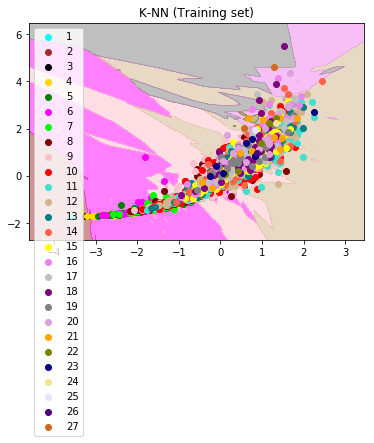

In [66]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('aqua','brown','black','gold','green',
                                                 'magenta','lime','maroon','pink','red',
                                                 'turquoise','tan','teal','tomato','yellow',
                                                 'violet','silver','purple','grey','plum',
                                                 'orange','olive','navy','khaki','lavender',
                                                 'indigo','chocolate')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('aqua','brown','black','gold','green',
                                                 'magenta','lime','maroon','pink','red',
                                                 'turquoise','tan','teal','tomato','yellow',
                                                 'violet','silver','purple','grey','plum',
                                                 'orange','olive','navy','khaki','lavender',
                                                 'indigo','chocolate'))(i), label = j)
plt.title('K-NN (Training set)')

plt.legend()
